In [18]:
import pandas as pd 
import datetime
from pandas_datareader import data as pdr 
import talib 
%matplotlib inline   
# esto hace que los gráficos se visualicen en el notebook
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [56]:
#Definimos fechas para este año 
start = datetime.datetime.now() - datetime.timedelta(days=365+100) 
end = datetime.datetime.now() 

#Bajamos datos del ticker
df= pdr.get_data_yahoo('GILD',start= start, end= end) 

#Enseñamos primeros datos 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-22,65.820000,64.750000,65.300003,64.910004,6302600.0,61.918049
2019-07-23,66.440002,64.680000,65.070000,66.400002,7854200.0,63.339367
2019-07-24,66.820000,65.830002,66.480003,66.639999,4592400.0,63.568314
2019-07-25,67.070000,66.199997,66.570000,66.320000,4061200.0,63.263058
2019-07-26,67.040001,65.919998,66.349998,66.919998,4790600.0,63.835396


In [57]:
# Añadimos media movil 
df['SMA']= talib.SMA(df['Close'], timeperiod=20) 

#Añadimos el spread entre el precio y la media 
df['Spread']= df['Close'] - df['SMA']

#Añadimos Z Score 
window=100 #En un periodo de 100 dias
col_mean = df["Spread"].rolling(window=window).mean()
col_std = df["Spread"].rolling(window=window).std()

df["ZScore"] = (df["Spread"] - col_mean)/col_std 

#Mostramos la nueva tabla
df=df.dropna(axis=0) 
df.head()

,High,Low,Open,Close,Volume,Adj Close,SMA,Spread,ZScore
Date,,,,,,,,,
2020-01-08,66.239998,64.809998,65.110001,65.800003,6607300.0,63.947662,66.0495,-0.249497,-0.247080
2020-01-09,66.070000,65.300003,65.809998,65.839996,5942300.0,63.986530,65.9875,-0.147504,-0.190632
2020-01-10,66.089996,64.980003,66.000000,65.029999,5153900.0,63.199333,65.8500,-0.820001,-0.659858
2020-01-13,65.260002,64.080002,65.050003,64.309998,6868900.0,62.499599,65.6840,-1.374002,-1.046502
2020-01-14,64.559998,63.910000,64.410004,64.199997,9929700.0,62.392696,65.6055,-1.405503,-1.058098


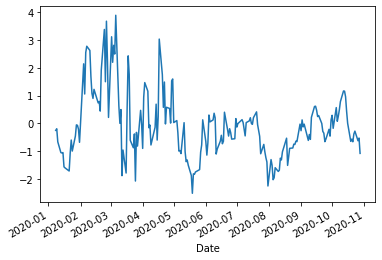

In [58]:
#Ploteamos el Z-Score
plt.figure() 
df.ZScore.plot() 
plt.show()


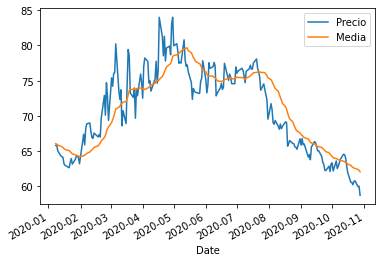

In [59]:
#Ploteamos la grafica de la empresa con la media 
plt.figure()
df.Close.plot(label='Precio')
df.SMA.plot(label='Media')
plt.legend()
plt.show()